In [23]:
import os
from zipfile import ZipFile

In [24]:
zip_file_path = '/content/de18b-women-fashion.zip'
extraction_directory = '/content/women_fashion/'

if not os.path.exists(extraction_directory):
    os.makedirs(extraction_directory)

with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_directory)

extracted_files = os.listdir(extraction_directory)
print(extracted_files[:10])

['__MACOSX', 'women fashion']


In [25]:
extraction_directory_updated = os.path.join(extraction_directory, 'women fashion')

extracted_files_updated = os.listdir(extraction_directory_updated)
extracted_files_updated[:10], len(extracted_files_updated)

(['short, blue floral dress with long puffed sleeves.jpg',
  'white knee-length dress with a fitted design and long sleeves.webp',
  'white, intricately detailed top and a flowing dark blue skirt.jpg',
  'ark green, knee-length dress with short sleeves and a white, patterned neckline.jpg',
  'vibrant blue and a neutral tone adorned with colorful floral patterns.jpg',
  'Latest-Party-Wear-One-Piece-Gown-For-Women.webp',
  'anarkali suit with intricate silver embellishments on the neckline, sleeves.jpg',
  'deep burgundy, silky dress with long sleeves and a wrap-style front.jpg',
  'black, sequined dress with thin shoulder straps.jpg',
  'ladies-party-wear-cotton-short-dress-full.jpg'],
 97)

In [26]:
from PIL import Image
import matplotlib.pyplot as plt

def display_image(file_path):
    image = Image.open(file_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

first_image_path = os.path.join(extraction_directory_updated, extracted_files_updated[0])
first_image_path

'/content/women_fashion/women fashion/short, blue floral dress with long puffed sleeves.jpg'

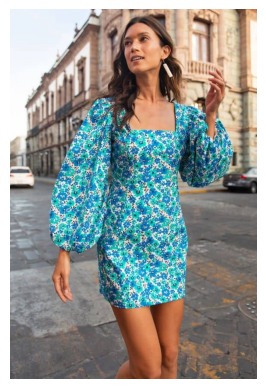

In [27]:
display_image(first_image_path)

In [28]:
import glob

image_directory = '/content/women_fashion/women fashion'

image_path_list = [file for file in glob.glob(os.path.join(image_directory, '*.*')) if file.endswith(('.jpg','.png','.jpeg','.webp'))]
image_path_list[:10]

['/content/women_fashion/women fashion/short, blue floral dress with long puffed sleeves.jpg',
 '/content/women_fashion/women fashion/white knee-length dress with a fitted design and long sleeves.webp',
 '/content/women_fashion/women fashion/white, intricately detailed top and a flowing dark blue skirt.jpg',
 '/content/women_fashion/women fashion/ark green, knee-length dress with short sleeves and a white, patterned neckline.jpg',
 '/content/women_fashion/women fashion/vibrant blue and a neutral tone adorned with colorful floral patterns.jpg',
 '/content/women_fashion/women fashion/Latest-Party-Wear-One-Piece-Gown-For-Women.webp',
 '/content/women_fashion/women fashion/anarkali suit with intricate silver embellishments on the neckline, sleeves.jpg',
 '/content/women_fashion/women fashion/deep burgundy, silky dress with long sleeves and a wrap-style front.jpg',
 '/content/women_fashion/women fashion/black, sequined dress with thin shoulder straps.jpg',
 '/content/women_fashion/women fas

In [29]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
import numpy as np

base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.output)

In [30]:
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)

    return preprocess_input(img_array_expanded)

In [31]:
def extract_features(model, preprocessed_img):
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / np.linalg.norm(flattened_features)

    return normalized_features

In [32]:
all_features = []
all_image_names = []

for img_path in image_path_list:
    preprocessed_img = preprocess_image(img_path)
    features = extract_features(model, preprocessed_img)

    all_features.append(features)
    all_image_names.append(os.path.basename(img_path))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 799ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 777ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 783ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 765ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [57]:
all_features

[array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0.        , 0.        , 0.        , ..., 0.        , 0.00226903,
        0.        ], dtype=float32),
 array([0.        , 0.        , 0.        , ..., 0.        , 0.00020819,
        0.        ], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00124355], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0.        , 0.        , 0.        , ..., 0.        , 0.00561854,
        0.        ], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 

In [58]:
all_image_names

['short, blue floral dress with long puffed sleeves.jpg',
 'white knee-length dress with a fitted design and long sleeves.webp',
 'white, intricately detailed top and a flowing dark blue skirt.jpg',
 'ark green, knee-length dress with short sleeves and a white, patterned neckline.jpg',
 'vibrant blue and a neutral tone adorned with colorful floral patterns.jpg',
 'Latest-Party-Wear-One-Piece-Gown-For-Women.webp',
 'anarkali suit with intricate silver embellishments on the neckline, sleeves.jpg',
 'deep burgundy, silky dress with long sleeves and a wrap-style front.jpg',
 'black, sequined dress with thin shoulder straps.jpg',
 'ladies-party-wear-cotton-short-dress-full.jpg',
 'black jumpsuit with a diagonal stripe of glittering material running across the body.jpg',
 'one-shoulder, fitted dress that features sequin embellishments and sheer panels.jpg',
 'one-shoulder, black, sequined dress with fringe detailing at the hem.jpg',
 'light brown sleeveless double-breasted blazer paired with

In [53]:
from scipy.spatial.distance import cosine

def recommend_fashion_items_cnn(input_image_path, all_features, all_image_names, model, top_n = 5):
    preprocessed_input_img = preprocess_image(input_image_path)
    input_features = extract_features(model, preprocessed_input_img)

    similarities = [1 - cosine(input_features, other_feature) for other_feature in all_features]
    similar_indices = np.argsort(similarities)[-top_n:]

    similar_indices = [idx for idx in similar_indices if idx != all_image_names.index(input_image_path)]

    plt.figure(figsize=(15,10))
    plt.subplot(1, top_n + 1, 1)
    plt.imshow(Image.open(input_image_path))
    plt.title("Input Image")
    plt.axis("off")

    for i, idx in enumerate(similar_indices[:top_n], start=1):
        image_path = os.path.join('/content/women_fashion/women fashion', all_image_names[idx])
        plt.subplot(1, top_n + 1, i + 1)
        plt.imshow(Image.open(image_path))
        plt.title(f"Recommendation {i}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 756ms/step


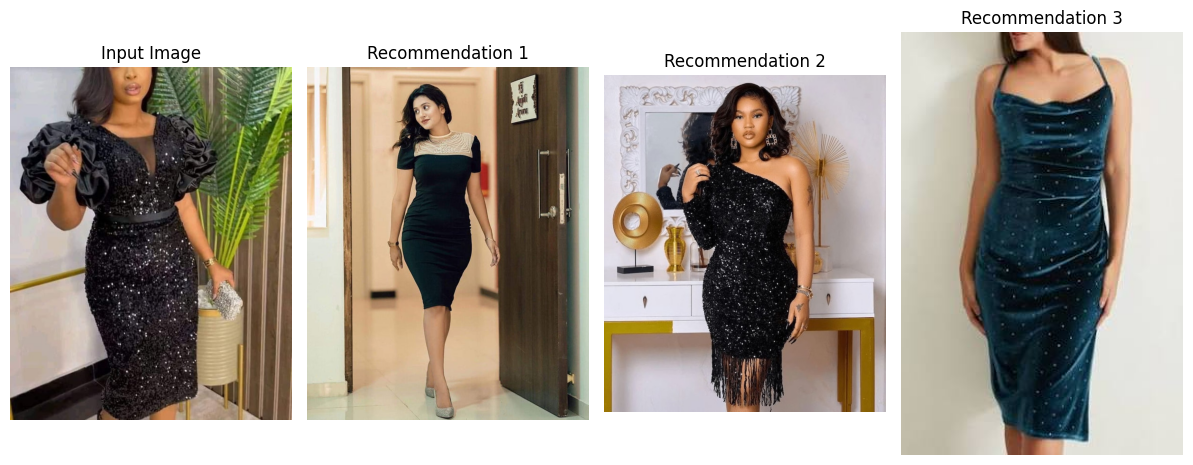

In [56]:
input_image_path = '/content/women_fashion/women fashion/sparkling black dress.jpg'
recommend_fashion_items_cnn(input_image_path, all_features, image_path_list, model, top_n=4)